In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

#Jupyterでインライン表示するための宣言
%matplotlib inline

In [21]:
in_jpg = './face.jpg'
in_dir = './images'
out_jpg = './ishi_out.jpg'
out_dir = './faces'

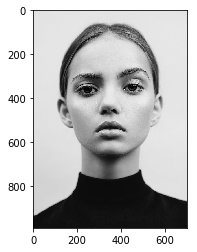

In [22]:
# 画像の読み込み
im = Image.open(in_jpg)
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

In [24]:
images = os.listdir(in_dir)

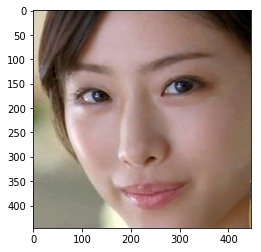

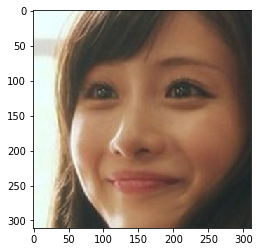

OSError: cannot identify image file './faces/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88-2015-10-24-12.13.40.png'

In [25]:
for file in images:
    # 画像の読み込み 
    image_gs = cv2.imread(os.path.join(in_dir, file))
    # 顔認識用特徴量ファイルを読み込む --- （カスケードファイルのパスを指定）
    cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_alt.xml")
    # 顔認識の実行
    face_list = cascade.detectMultiScale(image_gs,scaleFactor=1.1,minNeighbors=1,minSize=(100,100))
    
    #顔が１つ以上検出された時
    if len(face_list) > 0:
        for rect in face_list:
            image_gs = image_gs[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]

        cv2.imwrite(os.path.join(out_dir, file), image_gs)
        #出力画像の表示
        plt.show(plt.imshow(np.asarray(Image.open(os.path.join(out_dir, file)))))
        
    #顔が検出されなかった時
    else:
        print("no face")

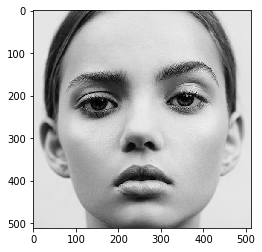